# Lab 10: Implementing K-Medoids Algorithm

```
Source Code:
```



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
from IPython.display import display_html

In [3]:
def toy_dataset():
    centers = [[1,1], [-1,-1], [1,-1]]
    n_clusters = len(centers)
    X, labels_true = make_blobs(n_samples=70, centers = centers, cluster_std=0.4, random_state=0)
    titles = ['x1', 'x2']
    data = pd.DataFrame(X, columns=titles)
    print("Do you want to view first 10 data elemenst?")
    choice = input()
    if choice=='yes':
        display_html(data)
    return data, X

In [4]:
def K_medoids(data):
    k_medoids = KMedoids(n_clusters=3, max_iter=50).fit(data)
    labels = k_medoids.labels_
    print("Learned cluster centroids for three clusters")
    centroids = k_medoids.cluster_centers_
    display_html(pd.DataFrame(centroids, columns=data.columns))
    return k_medoids, labels

In [5]:
def cluster_new_data(k_medoids):
    testData = np.array(
        [
            [0.81, 1.12],
            [-1.145, -1.194],
            [0.676, 0.7133],
            [0.442, -1.3245],
            [1.23623, 1.34634],
            [-0.93423, -0.0332],
            [-1.00234, -1.546],
            [1.534, 0.4789],
            [1.23523, 1.0547]
        ]
    )
    labels = KMedoids.predict(k_medoids, testData)
    labels = labels.reshape(-1,1)
    cols = ['x1','x2']
    cols.append('Assigned Cluster')
    newdata_cluster = pd.DataFrame(np.concatenate((testData, labels), axis=1), columns=cols)
    display_html(newdata_cluster)

In [6]:
def view_cluster(labels, X, k_medoids):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        class_member_mask = labels == k
        xy = X[class_member_mask]
        plt.plot(xy[:,0], xy[:,1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)
    plt.plot(k_medoids.cluster_centers_[:,0], k_medoids.cluster_centers_[:,1], "o", markerfacecolor="cyan",
             markeredgecolor="k", markersize=6,)
    plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [7]:
def main():
    data, X = toy_dataset()
    k_medoids, labels = K_medoids(data)
    print("Scatter plot of learned clusters:")
    view_cluster(labels, X, k_medoids)
    print("Do you want clustering for new data based on learned clusters?")
    choice = input()
    if choice == 'yes':
        cluster_new_data(k_medoids)
    else:
        quit()

**Output:**

Do you want to view first 10 data elemenst?
yes


,x1,x2
0,0.491806,-0.612241
1,1.747024,-0.637582
2,1.230636,-1.083320
3,-0.813735,-1.614497
4,-1.204322,-1.472253
...,...,...
65,-0.708364,-0.948407
66,-1.358187,-0.845239
67,1.004200,-0.285652
68,-0.544240,-1.493930


Learned cluster centroids for three clusters


,x1,x2
0,-1.124621,-0.977534
1,1.177545,1.133470
2,1.050765,-0.839204


Scatter plot of learned clusters:
Do you want clustering for new data based on learned clusters?
yes


,x1,x2,Assigned Cluster
0,0.81000,1.12000,1.0
1,-1.14500,-1.19400,0.0
2,0.67600,0.71330,1.0
3,0.44200,-1.32450,2.0
4,1.23623,1.34634,1.0
5,-0.93423,-0.03320,0.0
6,-1.00234,-1.54600,0.0
7,1.53400,0.47890,1.0
8,1.23523,1.05470,1.0


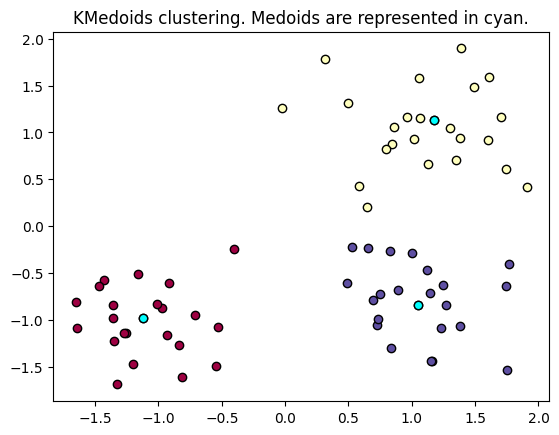

In [8]:
main()